<a href="https://colab.research.google.com/github/gonzalezulises/FDSMARZO24/blob/main/Parte_3_Proyecto_final_Ulises_Gonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto - Diagnóstico de prácticas de colaboración y desarrollo

  El archivo "responses.xlsx" es una recopilación de respuestas de una encuesta realizada a empleados en una organización. Este estudio esta diseñado para evaluar diversos aspectos de la experiencia laboral y la cultura organizacional desde la perspectiva de los empleados. Este conjunto de datos ofrece una visión integral de cómo los empleados perciben su lugar de trabajo, incluyendo aspectos positivos y oportunidades de mejora.

  Al analizar estas respuestas, podemos obtener información valiosa para fortalecer su cultura organizacional, mejorar procesos internos, y aumentar la satisfacción y el compromiso de sus empleados. La inclusión de fechas de respuesta y un identificador de red proporciona un contexto adicional para el análisis de datos, permitiendo evaluar la efectividad de las políticas y estrategias de la empresa a lo largo del tiempo. Este archivo es una herramienta esencial para el desarrollo organizacional y la planificación estratégica de cualquier organización.

  Los potenciales usos para estos datos incluyen:

  *  **Análisis de Cultura Organizacional:** Identificar fortalezas y áreas de mejora en la cultura de la empresa. Esto puede ayudar a la organización a entender mejor qué aspectos valoran los empleados y en qué áreas necesitan trabajar para mejorar la satisfacción y retención del personal.
  *   **Desarrollo de Planes de Mejora:** Utilizar las áreas de mejora señaladas por los empleados para desarrollar planes de acción específicos. Por ejemplo, si varios empleados mencionan que los procesos podrían ser más eficientes, la organización puede enfocarse en revisar y optimizar estos procesos.
  *  **Segmentación de Respuestas por Demografía:** Analizar las respuestas según diferentes grupos demográficos (por ejemplo, generación, género) para entender mejor cómo las percepciones pueden variar entre diferentes segmentos de empleados.
  *  **Medición de la Efectividad de Cambios Implementados:** Comparar los resultados de esta encuesta con futuras encuestas para medir el impacto de los cambios implementados en la organización. Esto puede ayudar a la empresa a entender si las iniciativas tomadas están teniendo el efecto deseado en la cultura organizacional y la satisfacción del empleado.
  * **Identificación de Embajadores de la Marca:** Identificar a los empleados que tienen percepciones positivas extremadamente altas sobre trabajar en la organización y considerarlos para roles de embajadores de la marca o para participar en actividades de reclutamiento.
  *  **Mejora de la Experiencia del Cliente:** Utilizar el feedback sobre la "experiencia del cliente" para directamente informar y mejorar las estrategias de servicio al cliente.
  *   **Desarrollo Profesional y Formación:** Identificar áreas comunes de interés o necesidad de mejora para desarrollar programas de formación y desarrollo profesional que estén alineados con las necesidades y deseos de los empleados.



## Preparación del Ambiente - Importación del módulo ##

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame, Series

## Importanción del archivo de trabajo (lectura del archivo alojado en Github)


In [15]:
url = "https://raw.githubusercontent.com/gonzalezulises/FDSMARZO24/main/responses.csv"
df = pd.read_csv(url)
print(df.head())

                                  # Me indica por favor su género  \
0  h8tmk2q68tb74868bxxk9az3h8tmk254                        Hombre   
1  dzj8ahc8qxhzbohxqddzj8ah0o2ezcol                        Hombre   
2  hhem4nl2le1plwp2pm3rzwhhem4nlxrq                        Hombre   
3  o6a2cs4n9qs98c76yorjjmo6a2cs0c5t                        Hombre   
4  kvss2505p40j36h9me7xkvssphetfojk                        Hombre   

    ¿A cuál generación pertenece? Estoy trabajando en TIGO desde….  \
0  Nacidos entre los años 81 y 90                    más de 4 años   
1  Nacidos entre los años 81 y 90                    más de 4 años   
2  Nacidos entre los años 81 y 90                    más de 4 años   
3  Nacidos entre los años 81 y 90                    más de 4 años   
4  Nacidos entre los años 81 y 90                    de 2 a 3 años   

  Lo que más me gusta de trabajar acá es...  \
0                Dinámico, una gran cultura   
1                 siempre estoy aprendiendo   
2         La cultura y 

#Revisión inicial del archivo


In [ ]:
df = encuesta #Ahora, df es un DataFrame de pandas que contiene los datos de la hoja de cálculo "respuestas" del Excel.

In [ ]:
print(df.head()) #visión general del DataFrame para entender su estructura y los tipos de datos

In [ ]:
print(df.info()) # Información sobre el DataFrame para ver los tipos de datos y si hay valores faltantes

#Indexacion y renombre de columnas
las columnas tienen nombres muy largos los voy a renombrar a través del uso de un diccionario

In [ ]:
df.reset_index(drop=True, inplace=True) #creando la indexación
df

In [ ]:
# Voy a crear un diccionario con los nombres de columnas actuales como claves y los nombres nuevos como valores por medio de una función
nombre_columnas = df.columns.tolist()
nombre_columnas

In [ ]:
nuevos_nombres = {nombre_columnas[i]: f'afirmacion {i+1}' for i in range(6, 46)}
nuevos_nombres #he creado un diccionario solo con las afirmaciones

In [ ]:
diccionario_invertido = {valor: clave for clave, valor in nuevos_nombres.items()}
#Los nombres de columnas son muy largos, voy a invertir el par
print(list(diccionario_invertido.items())[:5])

[('afirmacion 7', 'En TIGO Promovemos la sencillez en todos los aspectos. Ofrecemos la solución más simple y mínima que pueda ser satisfactoria para el cliente.'), ('afirmacion 8', 'Abordarmos el desarrollo de proyectos de forma iterativa e incremental, es decir, a medida que aprendemos de los resultados, actualizamos el plan de trabajo.'), ('afirmacion 9', 'Realizamos entregas frecuentes de productos o servicios terminados.'), ('afirmacion 10', 'Realizamos reuniones de planificación frecuentemente (frecuencia de pocas semanas no meses).'), ('afirmacion 11', 'Organizamos el trabajo en iteraciones con fechas previstas.')]


In [ ]:
def obtener_columna_y_nombre_original_por_nombre_corto(nombre_corto):
    nombre_original = diccionario_invertido.get(nombre_corto)
    if nombre_original in df.columns:
        return df[nombre_original], nombre_original
    else:
        print(f"El nombre corto '{nombre_corto}' no corresponde a una columna conocida.")
        return None, None

 #Esta función devuelve la columna del DataFrame y su nombre original basada en el nombre corto proporcionado.Utiliza 'diccionario_invertido' para encontrar el nombre original de la columna.


#Análisis Exploratorio de Datos (EDA)

In [ ]:
# Probando el :
columna, nombre_original = obtener_columna_y_nombre_original_por_nombre_corto('afirmacion 7')
if columna is not None:
    media = columna.mean()
    print(f"La media de '{nombre_original}' es: {media}")
else:
    print("Columna no encontrada.")




La media de 'En TIGO Promovemos la sencillez en todos los aspectos. Ofrecemos la solución más simple y mínima que pueda ser satisfactoria para el cliente.' es: 6.216666666666667


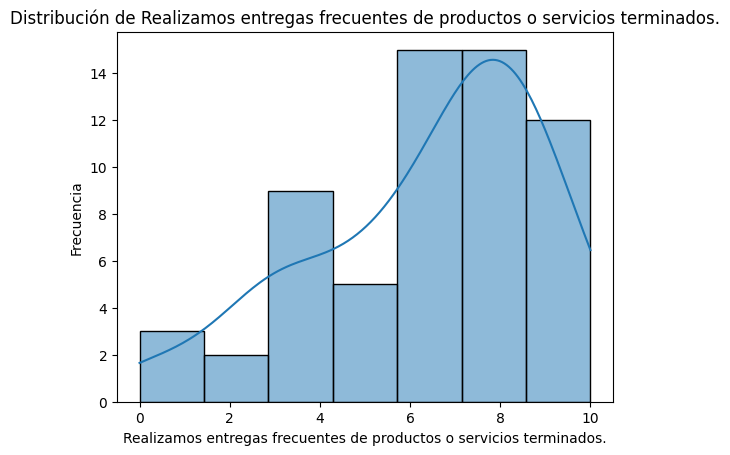

In [ ]:
nombre_columna = diccionario_invertido.get('afirmacion 9')

if nombre_columna:
    sns.histplot(df[nombre_columna], kde=True)
    plt.title(f'Distribución de {nombre_columna}')
    plt.xlabel(nombre_columna)
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print('La columna especificada no existe en el DataFrame.')


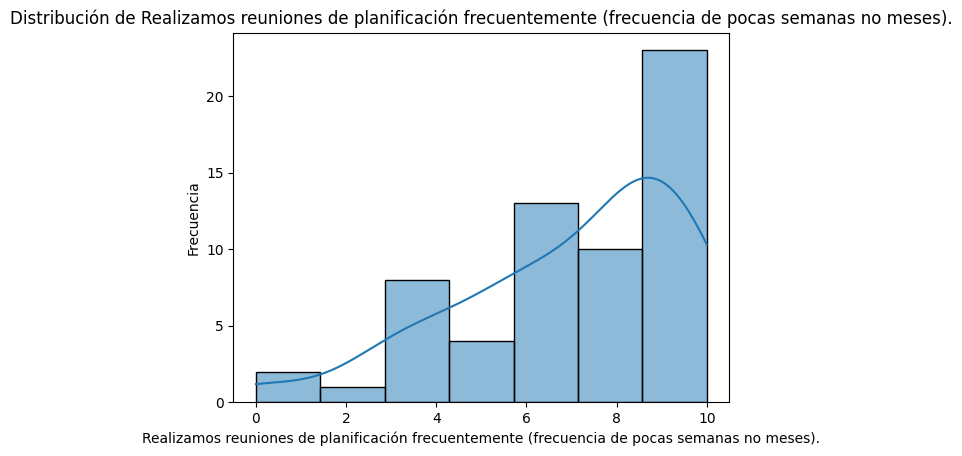

In [ ]:
nombre_columna = diccionario_invertido.get('afirmacion 10')

if nombre_columna:
    sns.histplot(df[nombre_columna], kde=True)
    plt.title(f'Distribución de {nombre_columna}')
    plt.xlabel(nombre_columna)
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print('La columna especificada no existe en el DataFrame.')


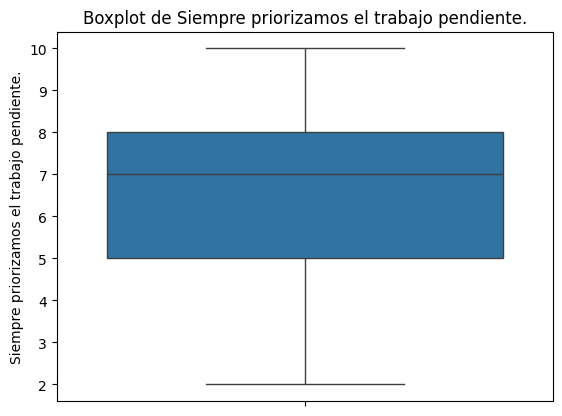

In [ ]:
nombre_columna = diccionario_invertido.get('afirmacion 14')

if nombre_columna:
    sns.boxplot(y=df[nombre_columna])
    plt.title(f'Boxplot de {nombre_columna}')
    plt.ylabel(nombre_columna)
    plt.show()
else:
    print('La columna especificada no existe en el DataFrame.')

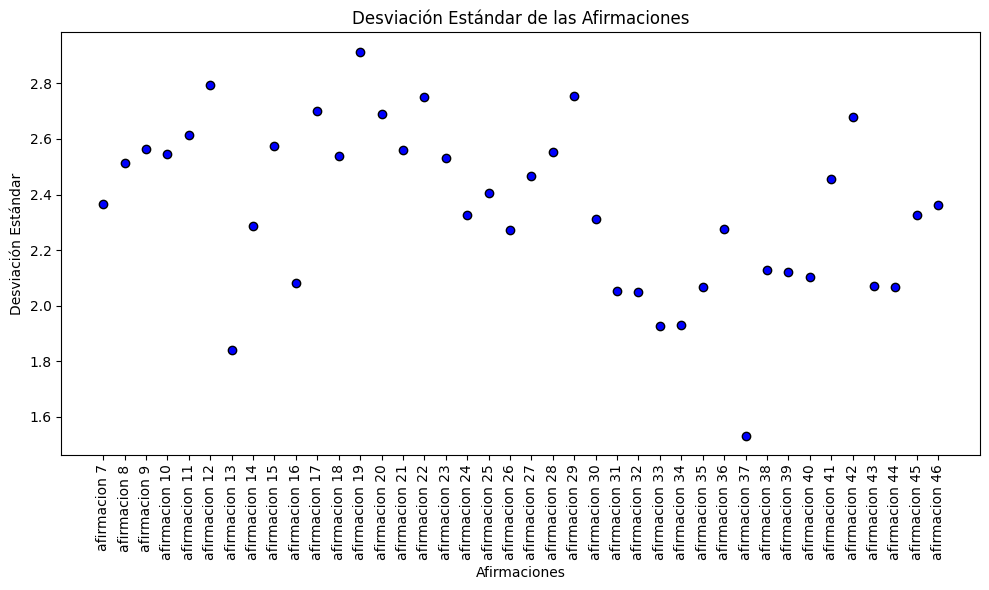

In [ ]:
desviaciones_estandar = {}
for nombre_corto, nombre_largo in diccionario_invertido.items():
    if 'afirmacion' in nombre_corto:  # Asegúrate de que solo incluyas las columnas relevantes
        desviaciones_estandar[nombre_corto] = df[nombre_largo].std()

eje_x = range(len(df_desviaciones['Afirmacion']))

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))  # Ajusta el tamaño según tus necesidades
plt.scatter(eje_x, df_desviaciones['Desviacion_Estandar'], color='blue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Desviación Estándar de las Afirmaciones')
plt.xlabel('Afirmaciones')
plt.ylabel('Desviación Estándar')

# Mejorar las etiquetas del eje X para mostrar las etiquetas de las afirmaciones
plt.xticks(eje_x, df_desviaciones['Afirmacion'], rotation='vertical')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros del subplot para dar espacio a las etiquetas
plt.show()

In [ ]:
# Ordenar el DataFrame por 'Desviacion_Estandar' de mayor a menor
df_desviaciones_sorted = df_desviaciones.sort_values('Desviacion_Estandar', ascending=False)

# Calcular el número de puntos que representan el 20% del total
num_puntos = len(df_desviaciones_sorted['Desviacion_Estandar'])
top_20_percent_idx = int(num_puntos * 0.2)

# Seleccionar el top 20% de las desviaciones estándar
top_20_percent = df_desviaciones_sorted[:top_20_percent_idx]


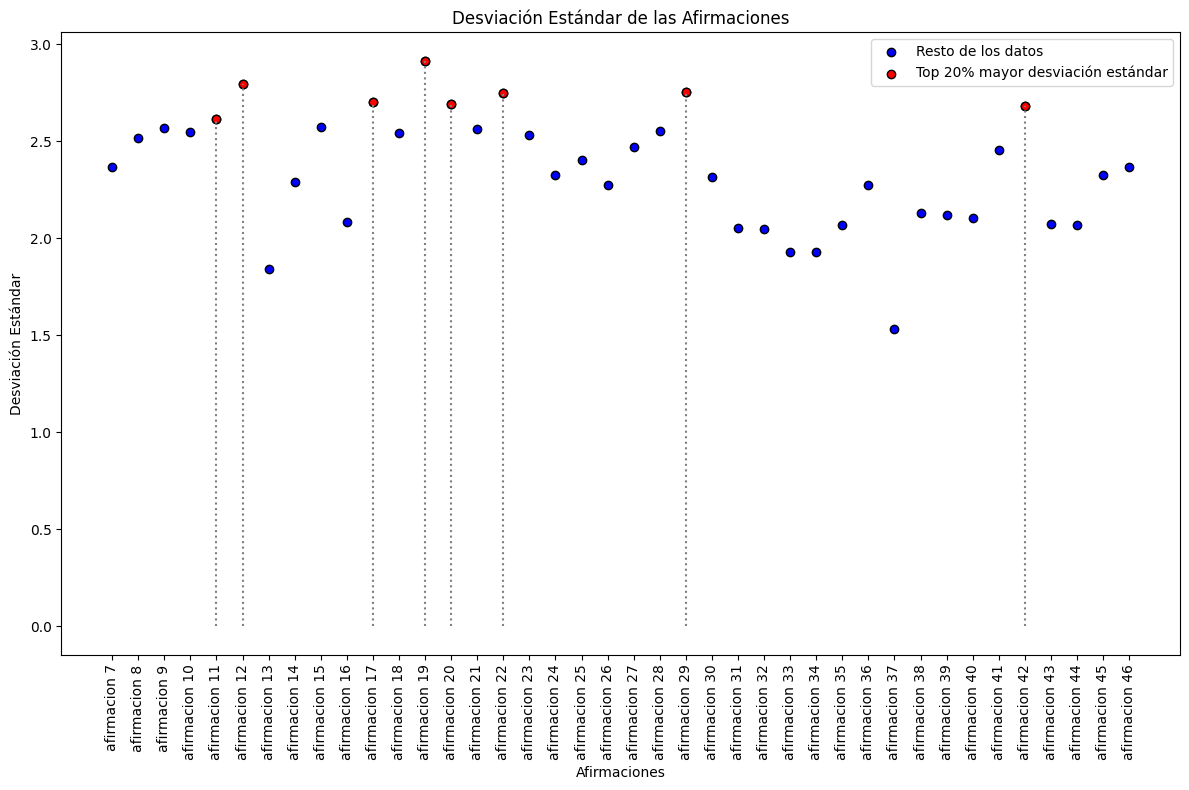

In [ ]:


# Generar secuencias numéricas para los ejes
eje_x = range(len(df_desviaciones['Afirmacion']))

# Crear el gráfico de puntos para todos los datos
plt.figure(figsize=(12, 8))
plt.scatter(eje_x, df_desviaciones['Desviacion_Estandar'], color='blue', edgecolor='black', label='Resto de los datos')

# Graficar el top 20% con un color diferente
top_20_percent_x = [eje_x[df_desviaciones['Afirmacion'].tolist().index(afirmacion)] for afirmacion in top_20_percent['Afirmacion']]
plt.scatter(top_20_percent_x, top_20_percent['Desviacion_Estandar'], color='red', edgecolor='black', label='Top 20% mayor desviación estándar')

# Añadir líneas guía para el top 20% desde los puntos hasta el eje X
for x, y in zip(top_20_percent_x, top_20_percent['Desviacion_Estandar']):
    plt.vlines(x, 0, y, colors='gray', linestyles='dotted')

# Añadir etiquetas y título
plt.title('Desviación Estándar de las Afirmaciones')
plt.xlabel('Afirmaciones')
plt.ylabel('Desviación Estándar')

# Mejorar las etiquetas del eje X para mostrar las etiquetas de las afirmaciones
plt.xticks(eje_x, df_desviaciones['Afirmacion'], rotation='vertical')

# Añadir leyenda
plt.legend()

# Ajustar layout y mostrar el gráfico
plt.tight_layout()
plt.show()
